In [1]:
import os
import cv2
import math
import time
import numpy as np
from scipy.interpolate import spline
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA 
from os.path import join as pj
from tqdm import tqdm_notebook as tqdm
from joblib import Parallel, delayed

In [2]:
filepath_by_idx = {}

ROOT = '/data/junction'
for idx in range(51, 91):
    filenames = []
    for root, dirs, files in os.walk('{}/{}'.format(ROOT, idx)):
        for file in files:
            filenames.append(pj(root, file))
    candidates = [filename for filename in filenames if os.path.splitext(filename)[1] in ['.avi', '.mkv']]
    if len(candidates) != 1:
        print('! {} Shit candidates {} != 1'.format(idx, len(candidates)))
        for filename in filenames:
            print(filename)
    else:
        filepath_by_idx[idx] = candidates[0]

! 62 Shit candidates 0 != 1


In [3]:
filepath_by_idx

{51: '/data/junction/51/Chuzhoy_1979_DTheaterRip_by_Dalemake.avi',
 52: '/data/junction/52/Velikiy.Dictator.1940.avi',
 53: '/data/junction/53/Sunset_Boulevard_HDRip_by_Indigo-child.avi',
 54: '/data/junction/54/Dr.Strangelove.1964.HDRip.All.Films.RG/Dr.Strangelove.1964.HDRip.All.Films.RG.avi',
 55: '/data/junction/55/Noviy_Kinoteatr_Paradiso.avi',
 56: '/data/junction/56/228/others_life.avi',
 57: '/data/junction/57/Hotaru No Haka (1988, XviD BDRip, RUS JAP+SUB) [Stranik 2.0]/Hotaru No Haka (1988, XviD BDRip, RUS JAP+SUB) [Stranik 2.0].avi',
 58: '/data/junction/58/1488/Paths.of.Glory.1957.Kubrick.AC3.rus.orig.XviD.DVDRip.avi',
 59: '/data/junction/59/Django_osvobozhdennyi_2012_BDRip_R5_by_Dalemake.avi',
 60: '/data/junction/60/Siyanie.avi',
 61: '/data/junction/61/Wall-E.2008.BDRip-AVC.mkv',
 63: '/data/junction/63/Krasota_Po_Amerikanski.avi',
 64: '/data/junction/64/The.Dark.Knight.Rises.2012.Dub.BDRip.1,46Gb.XviD.mp3.avi',
 65: '/data/junction/65/Princess Mononoke DVDRip-AVC (torre

In [4]:
def just_do_it_for_filepath(filepath):
    brightness = []
    
    cap = cv2.VideoCapture(filepath)
    frame_rate = cap.get(5)  # frame rate
    
    frame_counter = 0
    while cap.isOpened():
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % math.floor(frame_rate) == 0:
            frame_counter += 1

        if frame_id % 2000 == 0:
            grey = 0.2126 * frame[:, :, 0] + 0.7152 * frame[:, :, 1] + 0.0722 * frame[:, :, 2]
            brightness.append(np.average(grey))

    cap.release()
    return np.array(brightness)

(51, '/data/junction/51/Chuzhoy_1979_DTheaterRip_by_Dalemake.avi')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


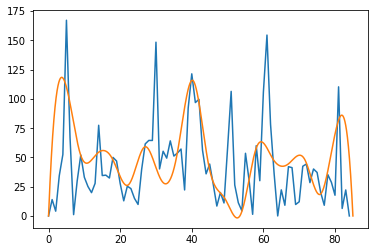

(52, '/data/junction/52/Velikiy.Dictator.1940.avi')


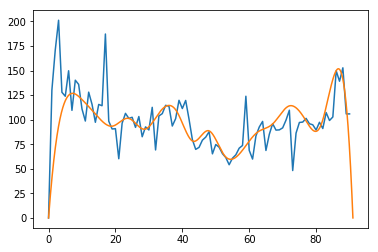

(53, '/data/junction/53/Sunset_Boulevard_HDRip_by_Indigo-child.avi')


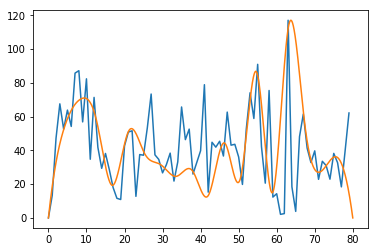

(54, '/data/junction/54/Dr.Strangelove.1964.HDRip.All.Films.RG/Dr.Strangelove.1964.HDRip.All.Films.RG.avi')


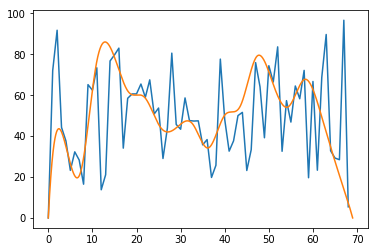

(55, '/data/junction/55/Noviy_Kinoteatr_Paradiso.avi')


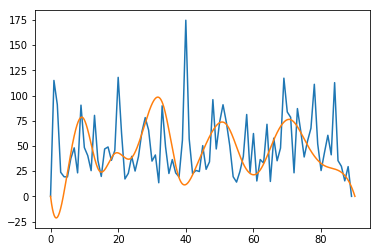

(56, '/data/junction/56/228/others_life.avi')


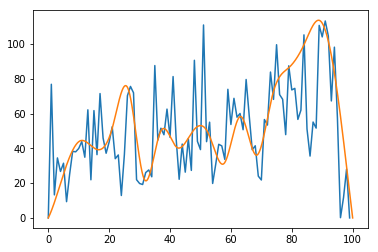

(57, '/data/junction/57/Hotaru No Haka (1988, XviD BDRip, RUS JAP+SUB) [Stranik 2.0]/Hotaru No Haka (1988, XviD BDRip, RUS JAP+SUB) [Stranik 2.0].avi')


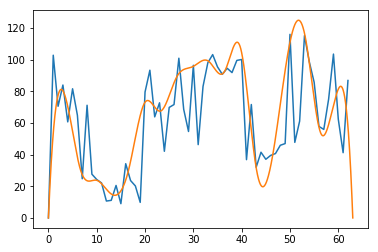

(59, '/data/junction/59/Django_osvobozhdennyi_2012_BDRip_R5_by_Dalemake.avi')


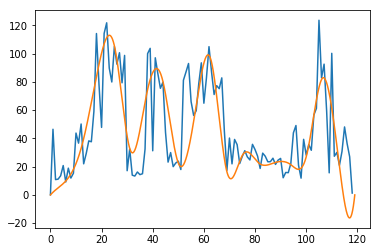

(60, '/data/junction/60/Siyanie.avi')


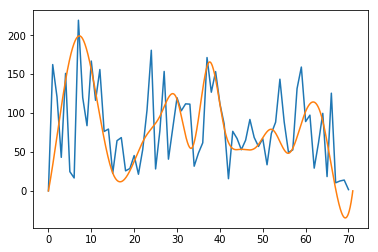

(63, '/data/junction/63/Krasota_Po_Amerikanski.avi')


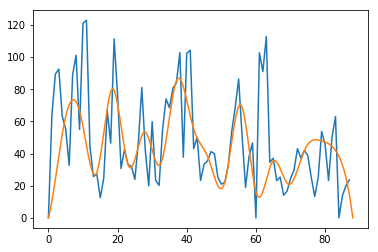

(64, '/data/junction/64/The.Dark.Knight.Rises.2012.Dub.BDRip.1,46Gb.XviD.mp3.avi')


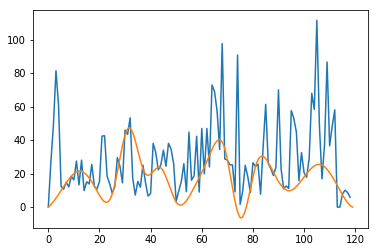

(65, '/data/junction/65/Princess Mononoke DVDRip-AVC (torrents.ru).mkv')


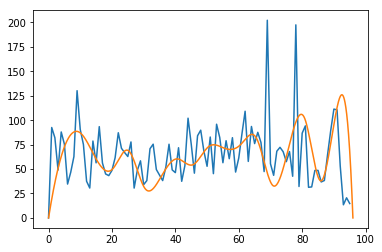

(66, '/data/junction/66/96.avi')


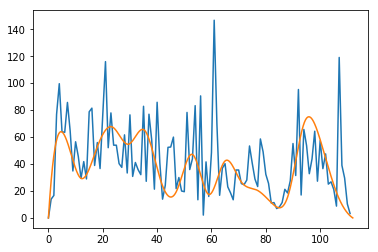

(68, '/data/junction/68/Svidetel\xe2\x80\x99_obvineniya_1957_WEB_DLRip_by_Dalemake.avi')


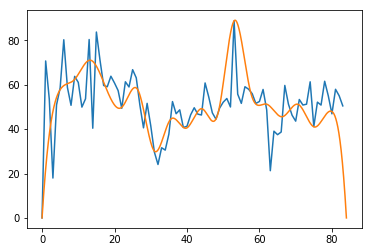

(69, '/data/junction/69/Odnajdy_v_Amerike_HDRip_[rutracker.org]_by_Scarabey.avi')


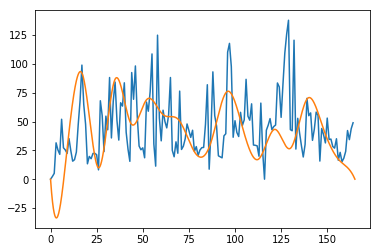

(70, "/data/junction/70/Podvodnaja.Lodka.1981.Director's.Cut.BDRip.All.Films.RG.avi")


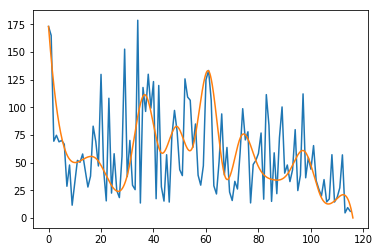

(72, '/data/junction/72/Grazhdanin Kein_1941_BDRip_by_Dalemake.avi')


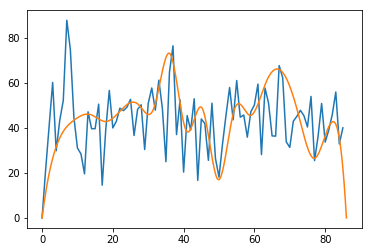

(73, '/data/junction/73/Golovokrujenie.1958.BDRip-AVC.mkv')


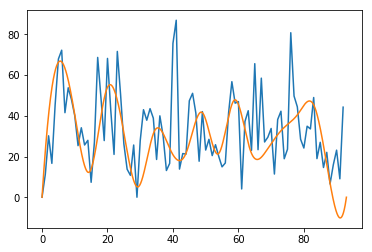

(74, '/data/junction/74/na_sever_cherez_severo-zapad_1.46_[torrents.ru]_by_bm11.avi')


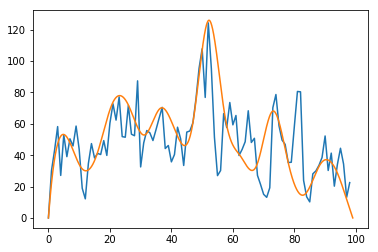

(75, '/data/junction/75/Star.Wars.Episode.VI.Return.of.the.Jedi.1983 by Joker/Star.Wars.Episode.VI.Return.of.the.Jedi.1983 by Joker.avi')


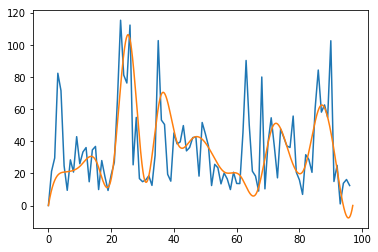

(76, '/data/junction/76/69/21.avi')


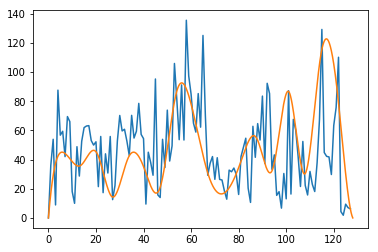

(77, '/data/junction/77/Beshenye.psy.1992.XviD.DVDRip.-All.Films.avi')


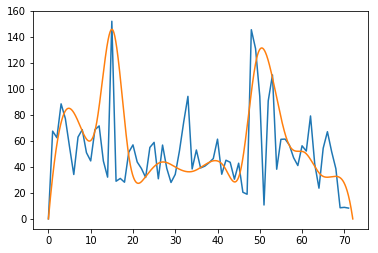

(78, '/data/junction/78/02.avi')


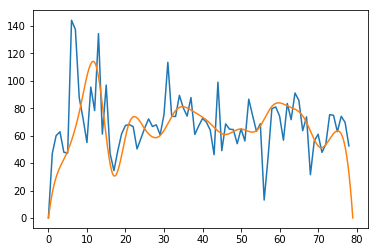

(79, '/data/junction/79/Requiem.Po.Mechte.2000.BDRip.avi')


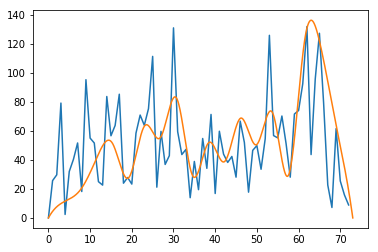

(80, "/data/junction/80/Le.Fabuleux.destin.d'Amelie.Poulain.(2001).AVC.AAC.[tRuAVC].mkv")


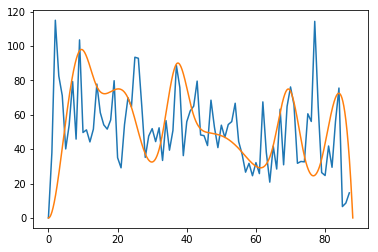

(81, '/data/junction/81/Zvezdochki.na.zemle.2007.HDRip-AVC.x264.AAC.1.45Gb.YTN.mkv')


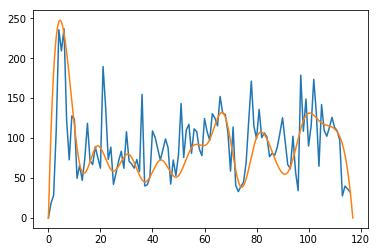

(82, '/data/junction/82/[DLS] Kimi no Na wa [Soer & MezIdA] [720p]/[DeadLine] Kimi no Na wa [Soer & MezIdA] [720p WEBRip].mkv')


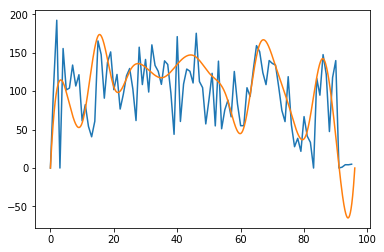

(83, '/data/junction/83/Zavodnoy.Apelsin.1972.BDRip.avi')


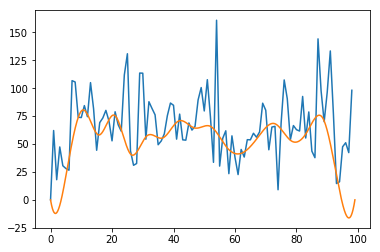

(84, '/data/junction/84/Lawrence.of.Arabia.1962.BDRip.AVC.All.Films.mkv')


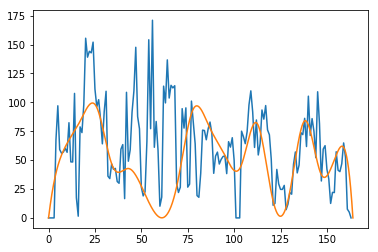

(85, '/data/junction/85/Dvoinaja.Strahovka.1944.HDTVRip.All.Films.RG/Dvoinaja.Strahovka.1944.HDTVRip.All.Films.RG.avi')


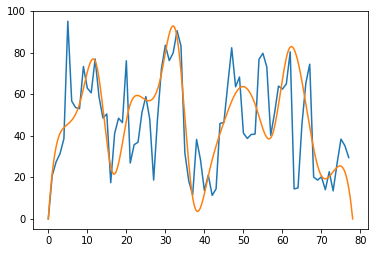

(86, '/data/junction/86/Amadeus.1984.hdrip_[1.46]_[teko].avi')


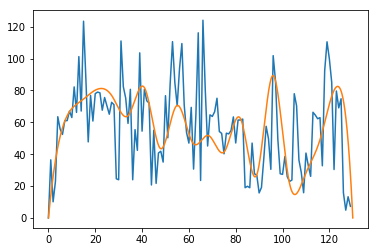

(87, '/data/junction/87/Vechnoe_sijanie_chistogo_razuma.avi')


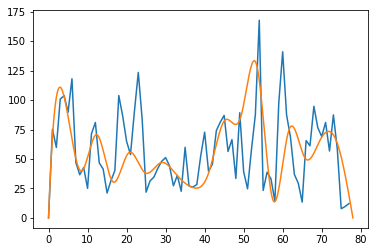

(88, '/data/junction/88/Taksist.avi')


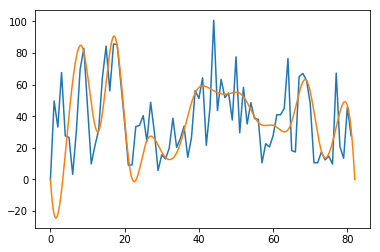

(89, '/data/junction/89/mockingbird.mkv')


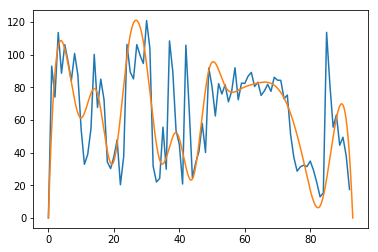

(90, '/data/junction/90/Full Metal Jacket.Full Screen.1987.RUS.DVDRip-AVC.x264.AC3.mkv')


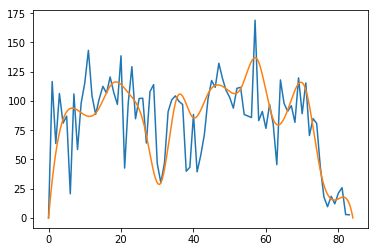

In [5]:
results_for_film = []

for idx, filepath in filepath_by_idx.items():
    print(idx, filepath)
    
    X = just_do_it_for_filepath(filepath)
    
    x_old = np.arange(len(X))
    x_new1 = np.linspace(0, len(X), 20)
    x_new2 = np.linspace(0, len(X), 4000)
    smooth = spline(x_old, X, x_new1)
    smooth = spline(x_new1, smooth, x_new2)
    
    results_for_film.append((idx, X, smooth, np.average(X)))

    plt.plot(X)
    plt.plot(x_new2, smooth)
    plt.show()

In [6]:
import json
results_for_film2 = [(idx, X.tolist(), smooth.tolist(), avgX) for idx, X, smooth, avgX in results_for_film]
with open('brightness 51-90.json', 'w') as f:
    f.write(json.dumps(results_for_film2))